# Soal
1. Melihat tabel ```database 1```, ada berapa banyak runtutan waktu pada tabel tersebut? Apa saja. Perlihatkan!
2. Masih pada tabel ```database 1```, perlihatkan juga ada berapa total user dan screen id di tabel tersebut.
3. Beralhi pada tabel ```database 2```, perlihatkan dalam bentuk visual yang sesuai, ada berapa total brand.
4. Apakah terdapat jumlah yang berbeda antara user pada tabel tabel ```database 1``` dan tabel ```database 2```? Buktikan!
5. Lakukan join pada kedua tabel tersebut. Tampilkan date, userid, screen id dan brand.
6. Buat sebuah variable baru yang diberi nama 'Harga' yang merupakan nilai dari perkalian jumlah permasing-masing brand, sessionid dan harga brand yang meliputi :
    - Oppo : 1500
    - Samsung : 3000
    - Apple : 5000
    - Xiaomi : 3500
    - Brand Lain : 1000
7. Coba visualisasikan data 'Harga' dengan grafik yang tepat.
8. Apakah ada perbedaan harga antara Oppo dan Xiaomi secara populasi?
9. Apakah harga Samsung lebih besar daripada Xiaomi secara populasi?
10. Buatlah grafik total penjualan antara oppo, samsung, dan apple dari waktu kewaktu

In [1]:
# Load libraries
import mysql.connector as cn
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
mydb = cn.connect(
    host = 'localhost',
    user = 'root',
    passwd = input('Insert MySQL Password : '),
    database = input('Insert Database : ')
)

# use database y which contain 'dataset1.sql' and 'dataset2.sql'

ProgrammingError: 1045 (28000): Access denied for user 'root'@'localhost' (using password: NO)

In [ ]:
mycursor = mydb.cursor()

def query (x) :
    mycursor.execute (x)
    result = mycursor.fetchall()
    df = pd.DataFrame(result, columns = mycursor.column_names)
    return df

In [ ]:
query(
    '''
    show tables    
    '''
)

,Tables_in_y
0,dataset1
1,dataset2


In [ ]:
query (
    '''
    select distinct(dt) Total_Runtutan_Waktu from dataset1
    ORDER BY Total_Runtutan_Waktu;
    '''
)

,Total_Runtutan_Waktu
0,2017-08-01
1,2017-08-02
2,2017-08-03
3,2017-08-04
4,2017-08-05
5,2017-08-06
6,2017-08-07
7,2017-08-08
8,2017-08-09
9,2017-08-10


1. Melihat tabel database 1, ada berapa banyak runtutan waktu pada tabel tersebut? Apa saja. Perlihatkan!

Masih pada tabel database 1, perlihatkan juga ada berapa total user dan screen id di tabel tersebut.

In [ ]:
query(
    '''
    select count(distinct(user_id)) as Total_User, count(distinct(screen_id)) as Screen_Id from dataset1;
    '''
)

,Total_User,Screen_Id
0,62210,6


In [ ]:
datax = query(
    '''
    SELECT * 
    FROM dataset1
    '''
)
datax

,dt,tm,user_id,session_id,screen_id
0,2017-08-01,0 days 05:52:00,7462310,fac31b39-7e78-45d7-bccc-f028d12ef2a4,1
1,2017-08-01,0 days 05:51:17,7462310,074735a6-a3fc-449c-9ea6-ab862b8c4051,1
2,2017-08-01,0 days 05:51:27,7462310,074735a6-a3fc-449c-9ea6-ab862b8c4051,1
3,2017-08-01,0 days 06:03:00,7453064,30407aa7-ee8c-418d-a181-cb3c28463709,1
4,2017-08-01,0 days 06:53:32,7461460,742320c3-7329-4af0-bbb7-aeed564ae323,1
...,...,...,...,...,...
3593211,2017-08-28,0 days 21:55:53,4871325,6ED9EF82-ECEA-43BA-ADD6-A3E0F53E3679,6
3593212,2017-08-28,0 days 21:56:19,4871325,6ED9EF82-ECEA-43BA-ADD6-A3E0F53E3679,6
3593213,2017-08-28,0 days 15:17:37,5500241,6BE1DB82-886B-4172-AED3-E070DF4473BA,6
3593214,2017-08-28,0 days 13:13:54,7389349,AC7DF609-BCBA-473F-9F56-DA9B88F3379A,6


In [ ]:
datax['user_id'].value_counts().head()

7410972    4328
7343763    3890
6785999    3810
7412550    3607
7426566    3490
Name: user_id, dtype: int64

In [ ]:
datax['screen_id'].value_counts().head()

3    1609399
1    1422900
2     430470
4      72677
6      29300
Name: screen_id, dtype: int64

Beralhi pada tabel database 2, perlihatkan dalam bentuk visual yang sesuai, ada berapa total brand.

In [ ]:
data1 = query(
    '''
    SELECT distinct(brand) as Brand, count(brand) as Qty 
    from dataset2 
    group by brand
    order by Qty desc;
    '''
)
data1

,Brand,Qty
0,samsung,8679
1,OPPO,5711
2,Xiaomi,4497
3,vivo,2932
4,Polytron,2150
...,...,...
135,myphone,1
136,B6S-pro,1
137,HOMTOM,1
138,WALTON,1


C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Brand', ylabel='Qty'>

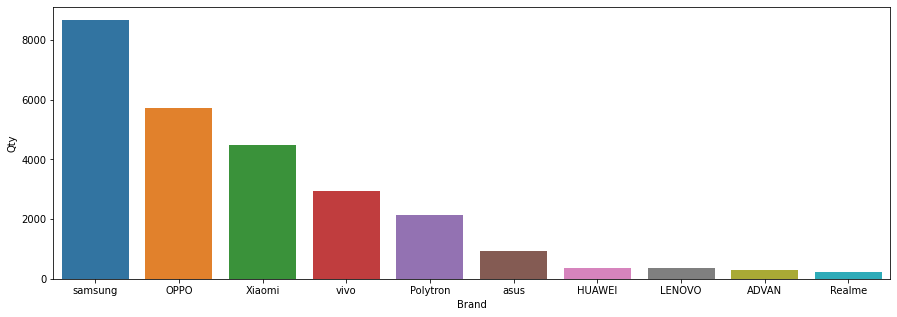

In [ ]:
plt.figure(figsize=(15,5))
sns.barplot(data1['Brand'][:10],data1['Qty'])

In [ ]:
Apakah terdapat jumlah yang berbeda antara user pada tabel tabel database 1 dan tabel database 2? Buktikan!

In [ ]:
query(
    '''
    select count(distinct(D1.user_id)) as DATA1, count(distinct(D2.user_id)) as DATA2
    from dataset1 D1
    left join dataset2 D2
    on D1.user_id = D2.user_id;
    '''
)

,DATA1,DATA2
0,62210,27984


In [ ]:
query(
    '''
    select count(distinct(user_id))
    FROM dataset1
    '''
)

,count(distinct(user_id))
0,62210


In [ ]:
query(
    '''
    select count(distinct(user_id))
    FROM dataset2
    '''
)

,count(distinct(user_id))
0,28024


5. Lakukan join pada kedua tabel tersebut. Tampilkan date, userid, screen id dan brand.

In [ ]:
data2 = query(
    '''
    SELECT D1.dt as date, D1.user_id, D1.screen_id, D2.brand
    FROM dataset1 D1
    JOIN dataset2 D2
    ON D1.user_id = D2.user_id
    '''
)
data2

,date,user_id,screen_id,brand
0,2017-08-31,7512439,1,samsung
1,2017-08-31,7513963,1,samsung
2,2017-08-31,7512831,1,ragentek
3,2017-08-31,7513752,1,OPPO
4,2017-08-31,7513752,1,OPPO
...,...,...,...,...
705201,2017-08-28,7492716,6,samsung
705202,2017-08-28,7509318,6,samsung
705203,2017-08-28,7469797,6,samsung
705204,2017-08-28,7469797,6,samsung


6. Buat sebuah variable baru yang diberi nama 'Harga' yang merupakan nilai dari perkalian jumlah permasing-masing brand, screen_id dan harga brand yang meliputi :
    - Oppo : 1500
    - Samsung : 3000
    - Apple : 5000
    - Xiaomi : 3500
    - Brand Lain : 1000

In [ ]:
def hrg (x):
    if x['brand'] == 'OPPO':
        return 1500
    elif x['brand'] == 'samsung':
        return 3000
    elif x['brand'] == 'Apple':
        return 5000
    elif x['brand'] == 'Xiaomi':
        return 3500
    else :
        return 1000

In [ ]:
data2['harga'] = data2[['brand']].apply(hrg, axis = 1)
data2

,date,user_id,screen_id,brand,harga
0,2017-08-31,7512439,1,samsung,3000
1,2017-08-31,7513963,1,samsung,3000
2,2017-08-31,7512831,1,ragentek,1000
3,2017-08-31,7513752,1,OPPO,1500
4,2017-08-31,7513752,1,OPPO,1500
...,...,...,...,...,...
705201,2017-08-28,7492716,6,samsung,3000
705202,2017-08-28,7509318,6,samsung,3000
705203,2017-08-28,7469797,6,samsung,3000
705204,2017-08-28,7469797,6,samsung,3000


In [ ]:
data3 = query(
    '''
    SELECT dt, brand, screen_id, count(screen_id) as jumlah_screen 
    FROM (
        SELECT dt, user_id, screen_id, brand
        FROM dataset1 
        INNER JOIN dataset2 
        USING(user_id)
    ) d
    GROUP BY brand, screen_id
    order by jumlah_screen desc
    '''
)
data3

,dt,brand,screen_id,jumlah_screen
0,2017-08-31,samsung,1,121973
1,2017-08-31,samsung,3,114486
2,2017-08-31,Xiaomi,1,54208
3,2017-08-31,Xiaomi,3,50533
4,2017-08-31,OPPO,1,34413
...,...,...,...,...
588,2017-08-24,FIH,6,1
589,2017-08-01,BLU,6,1
590,2017-08-25,S55B,6,1
591,2017-08-28,Foxconn,4,1


In [ ]:
def hrga (x):
    if x['brand'] == 'OPPO':
        return (1500 * x['screen_id'] * x['jumlah_screen'])
    elif x['brand'] == 'samsung':
        return (3000 * x['screen_id'] * x['jumlah_screen'])
    elif x['brand'] == 'Apple':
        return (5000 * x['screen_id'] * x['jumlah_screen'])
    elif x['brand'] == 'Xiaomi':
        return (3500 * x['screen_id'] * x['jumlah_screen'])
    else :
        return (1000 * x['screen_id'] * x['jumlah_screen'])

In [ ]:
data3.info()
data3['screen_id'] = data3['screen_id'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dt             593 non-null    object
 1   brand          593 non-null    object
 2   screen_id      593 non-null    object
 3   jumlah_screen  593 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 18.7+ KB


In [ ]:
data3.replace('iPhone','Apple', inplace=True)
data3.replace('iPad','Apple', inplace=True)
data3.replace('infinix','INFINIX', inplace=True)
data3.replace('EVERCOSS_A74A*','EVERCOSS', inplace=True)

In [ ]:
data3['harga'] = data3[['brand','screen_id','jumlah_screen']].apply(hrga,axis=1)
data3

,dt,brand,screen_id,jumlah_screen,harga
0,2017-08-31,samsung,1,121973,365919000
1,2017-08-31,samsung,3,114486,1030374000
2,2017-08-31,Xiaomi,1,54208,189728000
3,2017-08-31,Xiaomi,3,50533,530596500
4,2017-08-31,OPPO,1,34413,51619500
...,...,...,...,...,...
588,2017-08-24,FIH,6,1,6000
589,2017-08-01,BLU,6,1,6000
590,2017-08-25,S55B,6,1,6000
591,2017-08-28,Foxconn,4,1,4000


In [ ]:
pd.set_option('display.max_rows',145)
data3['brand'].value_counts()

apple                            10
S55B                              6
EVERCOSS                          6
alps                              6
WIKO                              6
ELEVATE                           6
TCLCommunications                 6
EVERCOSS-A74A                     6
Techain                           6
asus                              6
HUAWEI                            6
EVERCOSS_A74A*                    6
samsung                           6
Sony                              6
Coolpad                           6
MT                                6
ZTE                               6
MITO                              6
OnePlus                           6
HMD-Global                        6
Google                            6
LENOVO                            6
AS8                               6
OPPO                              6
ragentek                          6
ALDO                              6
manufacturer                      6
LAVA                        

In [ ]:
query(
    '''
    SELECT d1.dt, d2.brand, d1.screen_id,count(d2.brand) as jml_brand,
      CASE d2.brand
        WHEN 'Oppo' THEN 1500 
        WHEN 'Samsung' THEN 3000 
        WHEN 'Apple' THEN 5000
        WHEN 'Xiaomi' THEN 3500
        ELSE 1000 
      END as harga,
    count(d2.brand) * CASE d2.brand
        WHEN 'Oppo' THEN 1500 
        WHEN 'Samsung' THEN 3000 
        WHEN 'Apple' THEN 5000
        WHEN 'Xiaomi' THEN 3500
        ELSE 1000 
      END as jml_harga
    from dataset1 d1, dataset2 d2
    where d1.user_id = d2.user_id
    group by d2.brand,d1.screen_id
    order by jml_harga desc
    '''
)


,dt,brand,screen_id,jml_brand,harga,jml_harga
0,2017-08-31,samsung,1,121973,3000,365919000
1,2017-08-31,samsung,3,114486,3000,343458000
2,2017-08-31,Xiaomi,1,54208,3500,189728000
3,2017-08-31,Xiaomi,3,50533,3500,176865500
4,2017-08-31,samsung,2,27460,3000,82380000
...,...,...,...,...,...,...
588,2017-08-24,FIH,6,1,1000,1000
589,2017-08-01,BLU,6,1,1000,1000
590,2017-08-25,S55B,6,1,1000,1000
591,2017-08-28,Foxconn,4,1,1000,1000


In [ ]:
7. Coba visualisasikan data 'Harga' dengan grafik yang tepat.

In [ ]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593 entries, 0 to 592
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   dt             593 non-null    object
 1   brand          593 non-null    object
 2   screen_id      593 non-null    int32 
 3   jumlah_screen  593 non-null    int64 
 4   harga          593 non-null    int64 
dtypes: int32(1), int64(2), object(2)
memory usage: 21.0+ KB


In [ ]:
data3.head(10)

,dt,brand,screen_id,jumlah_screen,harga
0,2017-08-31,samsung,1,121973,365919000
1,2017-08-31,samsung,3,114486,1030374000
2,2017-08-31,Xiaomi,1,54208,189728000
3,2017-08-31,Xiaomi,3,50533,530596500
4,2017-08-31,OPPO,1,34413,51619500
5,2017-08-31,samsung,2,27460,164760000
6,2017-08-31,OPPO,3,26632,119844000
7,2017-08-31,Xiaomi,2,17471,122297000
8,2017-08-31,Polytron,1,17384,17384000
9,2017-08-31,Polytron,3,15458,46374000


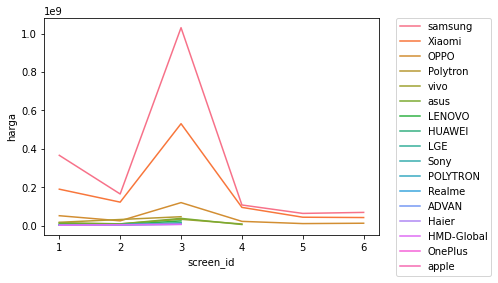

In [ ]:
brand1 = ['samsung','xiaomi','oppo', 'vivo','asus', 'realme','advan','Apple']
sns.lineplot(data = data3.head(50), x = 'screen_id', y = 'harga', hue = 'brand')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel=data3['harga']

In [ ]:
8. Apakah ada perbedaan harga antara Oppo dan Xiaomi secara populasi?

In [ ]:
import scipy
from scipy.stats import mannwhitneyu

C:\Users\lidya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='harga', ylabel='Density'>

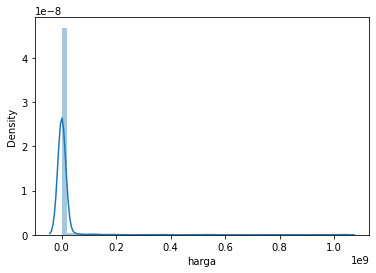

In [ ]:
sns.distplot(data3['harga'])

In [ ]:
Stat_hit, pval = mannwhitneyu(data3[data3['brand']=='OPPO']['harga'], data3[data3['brand']=="Xiaomi"]['harga'], alternative='two-sided')
if pval < 0.05 :
    print(pval,"Tolak H0")
else : 
    print(pval,"Gagal tolak H0")

0.04532756207797214 Tolak H0


In [ ]:
9. Apakah harga Samsung lebih besar daripada Xiaomi secara populasi?

In [ ]:
Stat_hit, pval = mannwhitneyu(data3[data3['brand']=='samsung']['harga'], data3[data3['brand']=="Xiaomi"]['harga'], alternative='greater')
if pval < 0.05 :
    print(pval,"Tolak H0")
else : 
    print(pval,"Gagal tolak H0")

0.28758676596009836 Gagal tolak H0


In [ ]:
10. Buatlah grafik total penjualan antara oppo, samsung, dan apple dari waktu kewaktu

In [ ]:
data4 = data3[(data3['brand']== 'OPPO') | (data3['brand']== 'samsung')| (data3['brand']== 'apple')]
data4['dt'] = pd.to_datetime(data4['dt'])
# plt.plot(data3[data3['brand']=='samsung']['dt'],data3[data3['brand']=='samsung']['harga'], label = 'Samsung')
# plt.plot(data3[data3['brand']=='OPPO']['dt'],data3[data3['brand']=='OPPO']['harga'], label = 'OPPO')
# plt.plot(data3[data3['brand']=='apple']['dt'],data3[data3['brand']=='apple']['harga'], label = 'apple')
data4

<ipython-input-196-930271130697>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data4['dt'] = pd.to_datetime(data4['dt'])


,dt,brand,screen_id,jumlah_screen,harga
0,2017-08-31,samsung,1,121973,365919000
1,2017-08-31,samsung,3,114486,1030374000
4,2017-08-31,OPPO,1,34413,51619500
5,2017-08-31,samsung,2,27460,164760000
6,2017-08-31,OPPO,3,26632,119844000
14,2017-08-31,samsung,4,8954,107448000
15,2017-08-31,OPPO,2,8328,24984000
24,2017-08-30,samsung,5,4241,63615000
25,2017-08-31,samsung,6,3828,68904000
26,2017-08-31,OPPO,4,3697,22182000


(array([17401., 17402., 17403., 17404., 17405., 17406., 17407., 17408.,
        17409.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

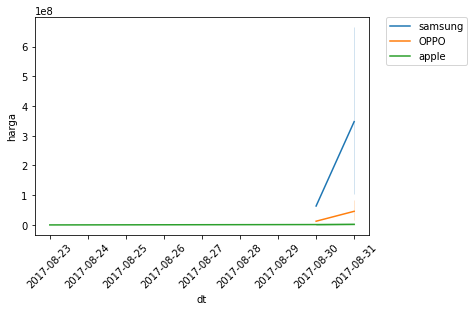

In [ ]:
sns.lineplot(data = data4, x = 'dt',y = 'harga', hue = 'brand')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xticks(rotation = 45)

In [ ]:
data3

,dt,brand,screen_id,jumlah_screen,harga
0,2017-08-31,samsung,1,121973,365919000
1,2017-08-31,samsung,3,114486,1030374000
2,2017-08-31,Xiaomi,1,54208,189728000
3,2017-08-31,Xiaomi,3,50533,530596500
4,2017-08-31,OPPO,1,34413,51619500
...,...,...,...,...,...
588,2017-08-24,FIH,6,1,6000
589,2017-08-01,BLU,6,1,6000
590,2017-08-25,S55B,6,1,6000
591,2017-08-28,Foxconn,4,1,4000


In [ ]:
query (
    '''
    select * from dataset2 limit 100;
    '''
)

,user_id,brand,join_dt
0,7513685,OPPO,2017-08-30
1,7513049,OPPO,2017-08-30
2,7513499,OPPO,2017-08-30
3,7512994,EVERCOSS_A74E,2017-08-30
4,7513198,Polytron,2017-08-30
...,...,...,...
95,7512332,OPPO,2017-08-30
96,7512507,OPPO,2017-08-30
97,7512463,OPPO,2017-08-30
98,7512334,OPPO,2017-08-30


In [ ]:
query (
    '''
    select * from dataset1 limit 100;
    '''
)

,dt,tm,user_id,session_id,screen_id
0,2017-08-01,0 days 05:52:00,7462310,fac31b39-7e78-45d7-bccc-f028d12ef2a4,1
1,2017-08-01,0 days 05:51:17,7462310,074735a6-a3fc-449c-9ea6-ab862b8c4051,1
2,2017-08-01,0 days 05:51:27,7462310,074735a6-a3fc-449c-9ea6-ab862b8c4051,1
3,2017-08-01,0 days 06:03:00,7453064,30407aa7-ee8c-418d-a181-cb3c28463709,1
4,2017-08-01,0 days 06:53:32,7461460,742320c3-7329-4af0-bbb7-aeed564ae323,1
...,...,...,...,...,...
95,2017-08-01,0 days 05:33:38,6886754,d9a8c2ae-abd2-4b80-9b92-58b76e4b8107,1
96,2017-08-01,0 days 05:36:16,6886754,d9a8c2ae-abd2-4b80-9b92-58b76e4b8107,1
97,2017-08-01,0 days 00:08:43,7256715,e5adfc0d-a7a9-47dd-af90-f513364fd9ec,1
98,2017-08-01,0 days 05:23:36,7283903,cfaedd14-1bdf-4661-ab77-d018409f8f82,1
